## Esercizio 1

### Exercise 01.1

<font color="blue">
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).
</font>

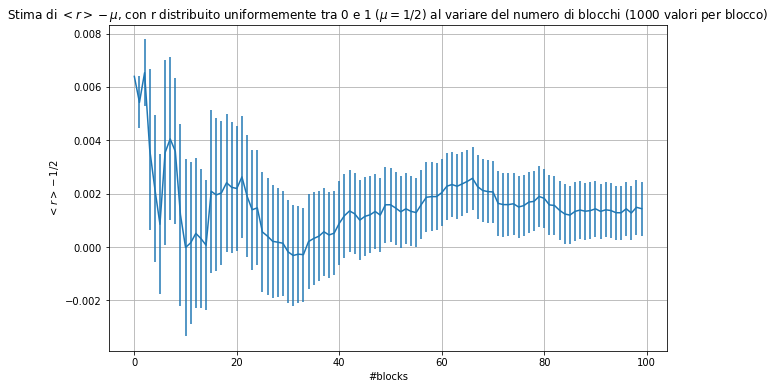

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

file=open("1_1/es1_1_mean.txt")
sum=0
for line in file:
    sum+=1
file.close()

mean, error = np.loadtxt("1_1/es1_1_mean.txt", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,6))

x=np.arange(sum)
plt.errorbar(x,mean,yerr=error)
plt.xlabel('#blocks')
plt.ylabel('$<r>-1/2$')
plt.title('Stima di $<r> - \mu $, con r distribuito uniformemente tra 0 e 1 ($\mu = 1/2)$ al variare del numero di blocchi (1000 valori per blocco)')
plt.grid(True)
plt.show()

<font color="blue">
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).
</font>

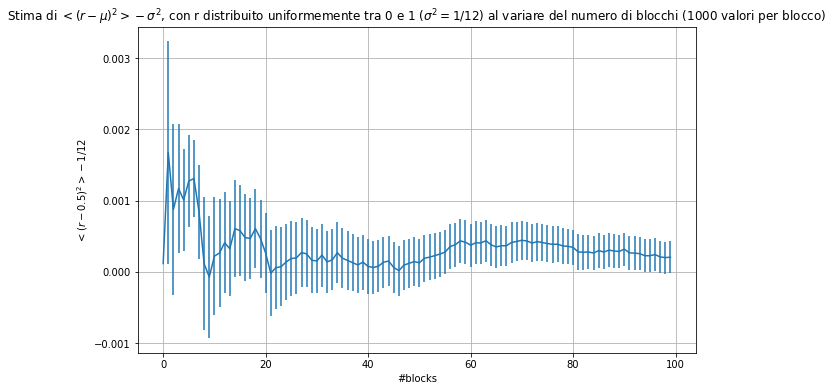

In [31]:
file=open("1_1/es1_1_err.txt")
sum=0
for line in file:
    sum+=1
file.close()

mean, error = np.loadtxt("1_1/es1_1_err.txt", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,6))

x=np.arange(sum)
plt.errorbar(x,mean,yerr=error)
plt.xlabel('#blocks')
plt.ylabel('$<(r-0.5)^2>-1/12$')
plt.title('Stima di $<(r - \mu)^2> - \sigma^2 $, con r distribuito uniformemente tra 0 e 1 ($\sigma^2 = 1/12$) al variare del numero di blocchi (1000 valori per blocco)')
plt.grid(True)
plt.show()

<font color="blue">
3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.
</font>

Chi^2 average =  99.5756


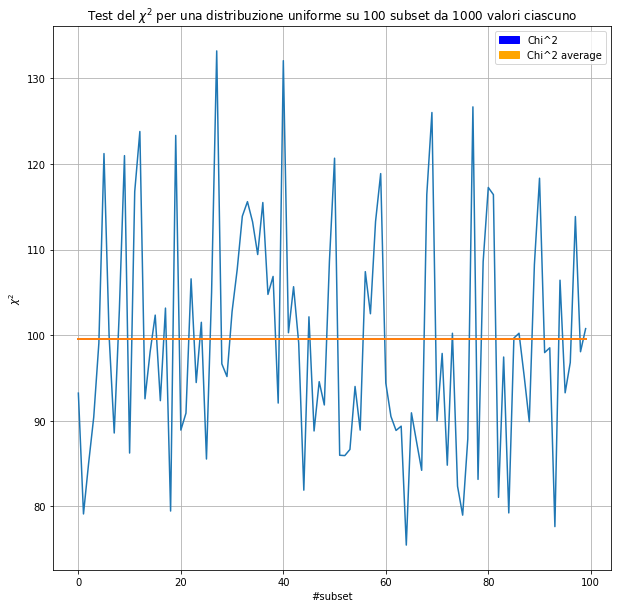

In [40]:
import matplotlib.patches as mpatches

file=open("1_1/es1_1_chi.txt")
sum=0
for line in file:
    sum+=1
file.close()

chi = np.loadtxt("1_1/es1_1_chi.txt", unpack='true')

plt.figure(figsize=(10,10))

x=np.arange(sum)
plt.plot(x,chi)
plt.xlabel('#subset')
plt.ylabel('$ \chi^2$')
plt.title('Test del $\chi^2$ per una distribuzione uniforme su 100 subset da 1000 valori ciascuno')
plt.grid(True)

average=np.zeros(sum)+np.average(chi)
plt.plot(x,average, linewidth=2)

blue_patch = mpatches.Patch(color='blue', label='Chi^2')
orange_patch = mpatches.Patch(color='orange', label='Chi^2 average')
plt.legend(handles=[blue_patch,orange_patch])
print ('Chi^2 average = ',np.average(chi))
plt.show()


Il valor medio del $\chi^2$ trovato è di 99.58, in pieno accordo con l'ipotesi di dati distribuiti uniformemente tra 0 e 1

### Exercise 01.2
<font color="blue">
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:


1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).

2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.
</font>

Nel file C++ sono stati implementati i codici per il campionamento delle distribuzioni esponenziale e lorentziana. Di seguito sono riportati gli isogrammi dei campionamenti delle distribuzioni uniforme, esponenziale e lorentziana

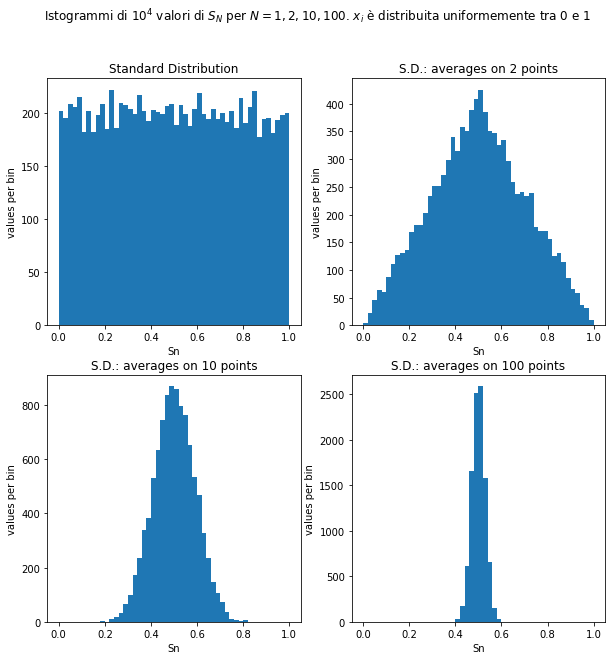

In [41]:
import math
from scipy.optimize import curve_fit
from scipy import stats

def gauss(x, mu, sigma):
    return ((1/math.sqrt(2*math.pi*sigma**2)) * np.exp(-1.0 * (x - mu)**2 / 
                                                       (2 * sigma**2)))
def lorentz(x, gamma, mean):
    return (1/(math.pi) * gamma/(gamma**2 + (x-mean)**2))

std1, std2, std10, std100 = np.loadtxt("1_2/es1_2_std.txt", usecols=(0,1,2,3), 
                                       unpack='true')
n_bins = 50

fig, axs= plt.subplots(2,2,figsize=(10,10))
axs[0,0].hist([std1], n_bins, range=(0,1),  histtype='stepfilled')
axs[0,1].hist([std2], n_bins, range=(0,1),  histtype='stepfilled')
axs[1,0].hist([std10], n_bins, range=(0,1),  histtype='stepfilled')
axs[1,1].hist([std100], n_bins, range=(0,1),  histtype='stepfilled')
axs[0, 0].set_title('Standard Distribution')
axs[0, 1].set_title('S.D.: averages on 2 points')
axs[1, 0].set_title('S.D.: averages on 10 points')
axs[1, 1].set_title('S.D.: averages on 100 points')

fig.suptitle('Istogrammi di $10^4$ valori di $S_N$ per $N=1, 2, 10, 100$. $x_i$ è distribuita uniformemente tra 0 e 1')

for ax in axs.flat:
    ax.set(xlabel='Sn', ylabel='values per bin')

Scarto quadratico medio - Gauss:  0.0036833674184902692
Scarto quadratico medio - Lorentz:  0.47774972635361324


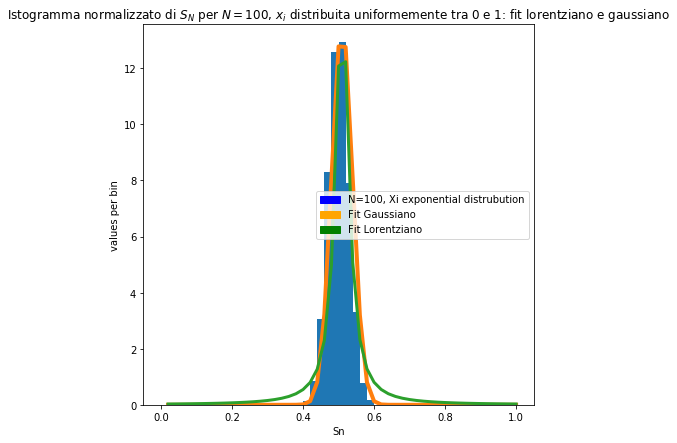

In [42]:
plt.figure(figsize=(7,7))

n, bins, patches = plt.hist(std100, n_bins, range=(0,1), density=True)
cut=bins[1:]
g_opt, g_cov = curve_fit(gauss, xdata=cut, ydata=n)
l_opt, l_cov = curve_fit(lorentz, xdata=cut, ydata=n)

y_fit_g = gauss(cut,g_opt[0],g_opt[1])
plt.plot(cut,y_fit_g,linewidth=4)

y_fit_l = lorentz(cut,l_opt[0],l_opt[1])
plt.plot(cut,y_fit_l,linewidth=3)

blue_patch = mpatches.Patch(color='blue', label='N=100, Xi exponential distrubution')
orange_patch = mpatches.Patch(color='orange', label='Fit Gaussiano')
green_patch = mpatches.Patch(color='green', label='Fit Lorentziano')
plt.legend(handles=[blue_patch,orange_patch,green_patch])

plt.xlabel("Sn")
plt.ylabel("values per bin")
plt.title('Istogramma normalizzato di $S_N$ per $N=100$, $x_i$ distribuita uniformemente tra 0 e 1: fit lorentziano e gaussiano')

sqm_gauss=0
sqm_lorentz=0

for i in range(n_bins):
    sqm_gauss += (n[i]-y_fit_g[i])**2/n_bins
    sqm_lorentz += (n[i]-y_fit_l[i])**2/n_bins
    
    
print("Scarto quadratico medio - Gauss: ", sqm_gauss)
print("Scarto quadratico medio - Lorentz: ", sqm_lorentz)

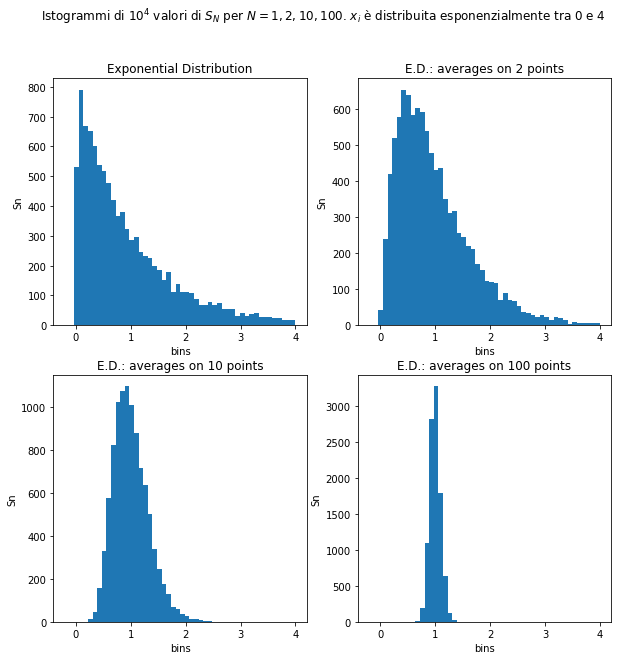

In [43]:
exp1, exp2, exp10, exp100 = np.loadtxt("1_2/es1_2_exp.txt", usecols=(0,1,2,3), 
                                       unpack='true')
n_bins = 50

fig, axs= plt.subplots(2,2,figsize=(10,10))
axs[0,0].hist([exp1], n_bins, range=(-0.2,4),  histtype='stepfilled')
axs[0,1].hist([exp2], n_bins, range=(-0.2,4),  histtype='stepfilled')
axs[1,0].hist([exp10], n_bins, range=(-0.2,4),  histtype='stepfilled')
axs[1,1].hist([exp100], n_bins, range=(-0.2,4),  histtype='stepfilled')
axs[0, 0].set_title('Exponential Distribution')
axs[0, 1].set_title('E.D.: averages on 2 points')
axs[1, 0].set_title('E.D.: averages on 10 points')
axs[1, 1].set_title('E.D.: averages on 100 points')

fig.suptitle('Istogrammi di $10^4$ valori di $S_N$ per $N=1, 2, 10, 100$. $x_i$ è distribuita esponenzialmente tra 0 e 4')

for ax in axs.flat:
    ax.set(xlabel='bins', ylabel='Sn')


Scarto quadratico medio - Gauss:  0.0021250029679491748
Scarto quadratico medio - Lorentz:  0.07332487753842065


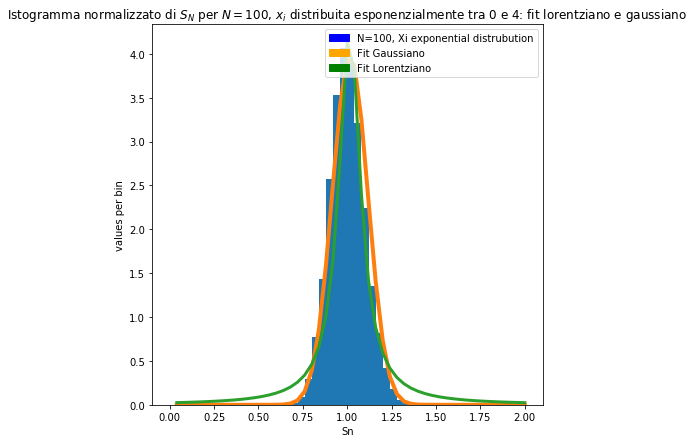

In [36]:
plt.figure(figsize=(7,7))

n, bins, patches = plt.hist(exp100, n_bins, range=(0,2), density=True)
cut=bins[1:]
g_opt, g_cov = curve_fit(gauss, xdata=cut, ydata=n, bounds=([0.5, 0.1],[1.5, 0.5]))
l_opt, l_cov = curve_fit(lorentz, xdata=cut, ydata=n)

y_fit_g = gauss(cut,g_opt[0],g_opt[1])
plt.plot(cut,y_fit_g,linewidth=4)

y_fit_l = lorentz(cut,l_opt[0],l_opt[1])
plt.plot(cut,y_fit_l,linewidth=3)

blue_patch = mpatches.Patch(color='blue', label='N=100, Xi exponential distrubution')
orange_patch = mpatches.Patch(color='orange', label='Fit Gaussiano')
green_patch = mpatches.Patch(color='green', label='Fit Lorentziano')
plt.legend(handles=[blue_patch,orange_patch,green_patch])

plt.xlabel("Sn")
plt.ylabel("values per bin")
plt.title('Istogramma normalizzato di $S_N$ per $N=100$, $x_i$ distribuita esponenzialmente tra 0 e 4: fit lorentziano e gaussiano')

sqm_gauss=0
sqm_lorentz=0

for i in range(n_bins):
    sqm_gauss += (n[i]-y_fit_g[i])**2/n_bins
    sqm_lorentz += (n[i]-y_fit_l[i])**2/n_bins
    
    
print("Scarto quadratico medio - Gauss: ", sqm_gauss)
print("Scarto quadratico medio - Lorentz: ", sqm_lorentz)

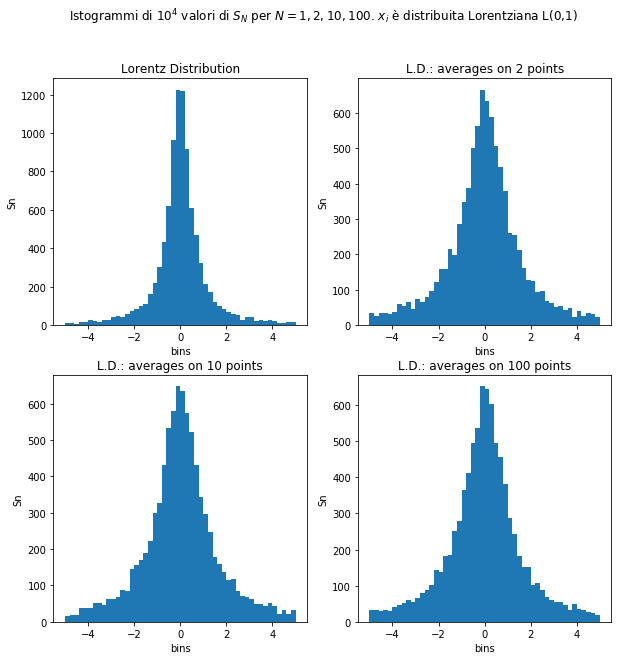

In [44]:
lor1, lor2, lor10, lor100 = np.loadtxt("1_2/es1_2_lor.txt", usecols=(0,1,2,3), unpack='true')
n_bins = 50

fig, axs= plt.subplots(2,2,figsize=(10,10))
axs[0,0].hist([lor1], n_bins, range=(-5,5), histtype='stepfilled')
axs[0,1].hist([lor2], n_bins, range=(-5,5), histtype='stepfilled')
axs[1,0].hist([lor10], n_bins, range=(-5,5),  histtype='stepfilled')
axs[1,1].hist([lor100], n_bins, range=(-5,5),  histtype='stepfilled')
axs[0, 0].set_title('Lorentz Distribution')
axs[0, 1].set_title('L.D.: averages on 2 points')
axs[1, 0].set_title('L.D.: averages on 10 points')
axs[1, 1].set_title('L.D.: averages on 100 points')

fig.suptitle('Istogrammi di $10^4$ valori di $S_N$ per $N=1, 2, 10, 100$. $x_i$ è distribuita Lorentziana L(0,1)')

for ax in axs.flat:
    ax.set(xlabel='bins', ylabel='Sn')


Scarto quadratico medio - Gauss:  0.0007298752512582673
Scarto quadratico medio - Lorentz:  0.0002270765947158202


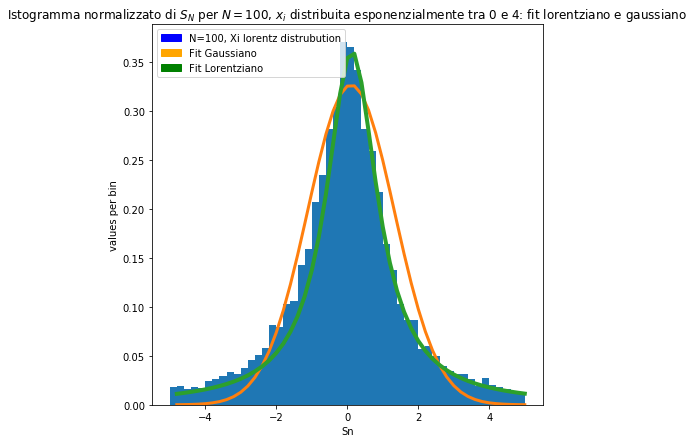

In [38]:
plt.figure(figsize=(7,7))

n, bins, patches = plt.hist(lor100, n_bins, range=(-5,5), density=True)
cut=bins[1:]
g_opt, g_cov = curve_fit(gauss, xdata=cut, ydata=n)
l_opt, l_cov = curve_fit(lorentz, xdata=cut, ydata=n)

y_fit_g = gauss(cut,g_opt[0],g_opt[1])
plt.plot(cut,y_fit_g,linewidth=3)

y_fit_l = lorentz(cut,l_opt[0],l_opt[1])
plt.plot(cut,y_fit_l,linewidth=4)

blue_patch = mpatches.Patch(color='blue', label='N=100, Xi lorentz distrubution')
orange_patch = mpatches.Patch(color='orange', label='Fit Gaussiano')
green_patch = mpatches.Patch(color='green', label='Fit Lorentziano')
plt.legend(handles=[blue_patch,orange_patch,green_patch])

plt.xlabel("Sn")
plt.ylabel("values per bin")
plt.title('Istogramma normalizzato di $S_N$ per $N=100$, $x_i$ distribuita esponenzialmente tra 0 e 4: fit lorentziano e gaussiano')

sqm_gauss=0
sqm_lorentz=0

for i in range(n_bins):
    sqm_gauss += (n[i]-y_fit_g[i])**2/n_bins
    sqm_lorentz += (n[i]-y_fit_l[i])**2/n_bins
    
    
print("Scarto quadratico medio - Gauss: ", sqm_gauss)
print("Scarto quadratico medio - Lorentz: ", sqm_lorentz)

### Exercise 01.3
<font color="blue">
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.</font>

Il codice C++ per la simulazione dell'esperimento di Buffon è stato implementato secondo questo schema:
- Considero una porzione di piano "A" di dimensione DxD, con D=100xd (d=spacing tra 2 linee). Genero il primo punto P1(x1,y1) casuale all'interno di A: esso sarà il primo estremo del mio 'ago'
- Genero punti casuali nel quadrato centrato in 0 e di lato 2 finchè il punto generato ha distanza dal centro <1, ovvero che si trovi all'interno di una circonferenza di raggio unitario centrata nell'origine. Esso è il secondo punto P2(x2,y2)
- Costruisco un terzo punto P3(x3,y3) a distanza L da P1, la cui direzione è pari a quella di P2 rispetto a O
- Verifico se il segmento P1P3 costruito interseca la 'griglia' sul piano orizzontale. Le linee sono prese ortogonali all'asse delle ascisse
- Reitero il procedimento per un numero desiderato di volte


Di seguito è mostrata la stima ottenuta di $\pi$ al variare del numero di blocchi

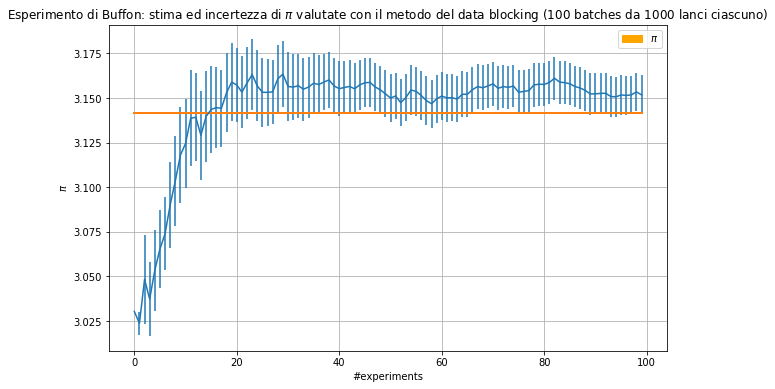

In [39]:
file=open("1_3/es1_3_pi.txt")
sum=0
for line in file:
    sum+=1
file.close()

pi, error = np.loadtxt("1_3/es1_3_pi.txt", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,6))

x=np.arange(sum)
plt.errorbar(x,pi,yerr=error)
plt.xlabel('#experiments')
plt.ylabel('$\pi$')
plt.grid(True)
plt.title('Esperimento di Buffon: stima ed incertezza di $\pi$ valutate con il metodo del data blocking (100 batches da 1000 lanci ciascuno)')


ypi=np.zeros(sum)+math.pi
plt.plot(x,ypi, linewidth=2)

orange_patch = mpatches.Patch(color='orange', label='$\pi$')
plt.legend(handles=[orange_patch])

plt.show()
